<a href="https://colab.research.google.com/github/Tabook22/ComputerVision/blob/main/Automatic_Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source: https://www.youtube.com/watch?v=NApYP_5wlKY

**1- Install and Import Dependencies**

In [2]:
!pip install opencv-python

In [4]:
!pip install torch

In [7]:
!pip install easyocr imutils numpy matplotlib

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr


2- Read images, grayscale and blure

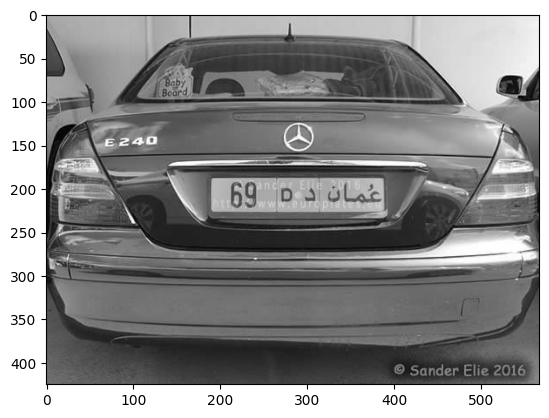

In [22]:
img=cv2.imread('cp2.jpeg')
#converting color to gray
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

**3- Apply filter and dind edges for localization**

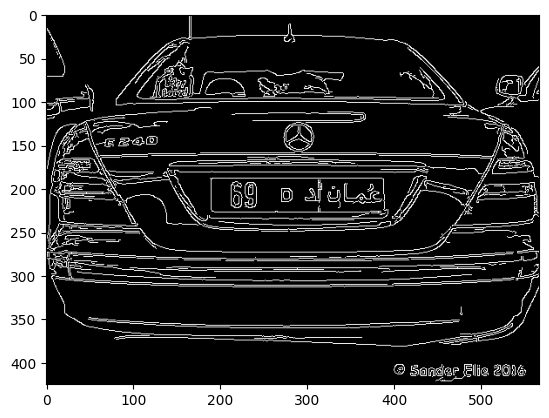

In [23]:
bfilter=cv2.bilateralFilter(gray, 11,17,17) #Noise reduction
edged =cv2.Canny(bfilter,30,200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))


**Find Contours and Apply Mask**

In [59]:
#Going through the image and try to find the shape
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [74]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [75]:
location

array([[[287, 124]],

       [[273, 147]],

       [[294, 157]],

       [[307, 139]]], dtype=int32)

In [66]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img, mask=mask)

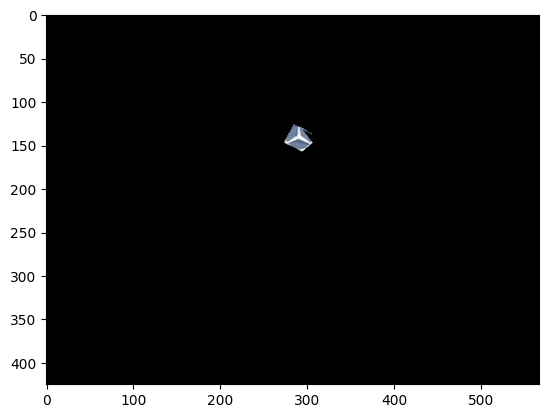

In [67]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

5- Use Easy OCR to Read Text